<a href="https://colab.research.google.com/github/cynthialmy/DataVizLab/blob/main/Hands-On-Sentiment-Analysis-with-Scikit-learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with Scikit-learn

This project is based on the Yelp competition[https://www.drivendata.org/competitions/5/keeping-it-fresh-predict-restaurant-inspections/page/17/]. Sentiment analysis refers to analyzing an opinion or feelings about something using data like text or images, regarding almost anything. Sentiment analysis helps companies in their decision-making process.

## Objectives

1. Collect and pre-process data from Yelp reviews of restaurants.
2. Perform sentiment analysis on the reviews to determine the overall sentiment towards the food quality.
3. Train a machine learning model using scikit-learn to predict the review scores of restaurants.
4. Identify the strengths and weaknesses of the machine learning model and suggest areas for improvement.

## Sentiment Analysis

The sentiment analysis will be performed using the Natural Language Processing (NLP) library, nltk. The sentiment analysis will be performed on the reviews to determine the overall sentiment towards the review scores.

## Sample of dataset

The data for this project will be collected from the Yelp API. The data will be pre-processed to remove any irrelevant information and to ensure that only the relevant information is used in the analysis.

All data set can be accessed and downloaded from Yelp Open Data Set [https://www.yelp.com/dataset/download].

In [1]:
# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [ ]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('https://raw.githubusercontent.com/cynthialmy/DataVizLab/main/yelp_dataset/yelp.csv')


Shape of the dataset:
(10000, 10)
Column names:
Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')
Datatype of each column:
business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
dtype: object
Few dataset entries:
              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday 

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
count,10000,10000,10000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000
unique,4174,1995,10000,NaN,9998,1,6403,NaN,NaN,NaN
top,JokKtdXU7zXHcr20Lrk29A,2011-03-28,fWKvX83p0-ka4JS3dc6E5A,NaN,Great service,review,fczQCSmaWF78toLEmb0Zsw,NaN,NaN,NaN
freq,37,21,1,NaN,2,10000,38,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.777500,NaN,NaN,NaN,0.876800,1.409300,0.701300
std,NaN,NaN,NaN,1.214636,NaN,NaN,NaN,2.067861,2.336647,1.907942
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000
75%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,1.000000,2.000000,1.000000


In [ ]:
# SHAPE OF THE DATASET
print("Shape of the dataset:")
print(data.shape)


Shape of the dataset:
(10000, 11)


In [ ]:
# COLUMN NAMES
print("Column names:")
print(data.columns)


Column names:
Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny', 'length'],
      dtype='object')


In [ ]:
# DATATYPE OF EACH COLUMN
print("Datatype of each column:")
print(data.dtypes)


Datatype of each column:
business_id    object
date           object
review_id      object
stars           int64
text           object
type           object
user_id        object
cool            int64
useful          int64
funny           int64
length          int64
dtype: object


In [ ]:
# SEEING FEW OF THE ENTRIES
print("Few dataset entries:")
print(data.head())


Few dataset entries:
              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  length  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0     889  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0 

In [ ]:
# DATASET SUMMARY
data.describe(include='all')

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
count,10000,10000,10000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000
unique,4174,1995,10000,NaN,9998,1,6403,NaN,NaN,NaN,NaN
top,JokKtdXU7zXHcr20Lrk29A,2011-03-28,fWKvX83p0-ka4JS3dc6E5A,NaN,Great service,review,fczQCSmaWF78toLEmb0Zsw,NaN,NaN,NaN,NaN
freq,37,21,1,NaN,2,10000,38,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.777500,NaN,NaN,NaN,0.876800,1.409300,0.701300,710.738700
std,NaN,NaN,NaN,1.214636,NaN,NaN,NaN,2.067861,2.336647,1.907942,617.399827
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,294.000000
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000,541.500000
75%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,1.000000,2.000000,1.000000,930.000000


In [ ]:
#CREATING A NEW COLUMN IN THE DATASET FOR THE NUMBER OF WORDS IN THE REVIEW
data['length'] = data['text'].apply(len)
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


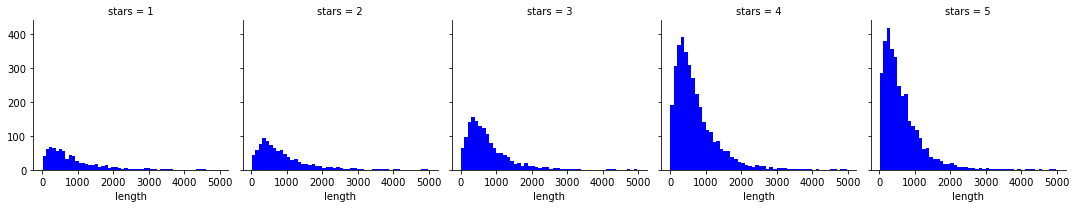

In [ ]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=data,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

<AxesSubplot:xlabel='stars', ylabel='cool'>

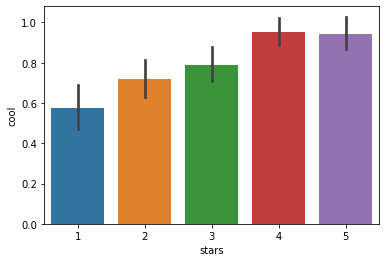

In [ ]:
sns.barplot(data=data, x="stars", y="cool")

<AxesSubplot:xlabel='stars', ylabel='useful'>

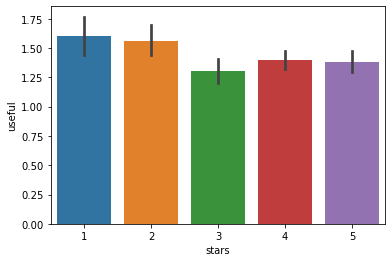

In [ ]:
sns.barplot(data=data, x="stars", y="useful")

<AxesSubplot:xlabel='stars', ylabel='funny'>

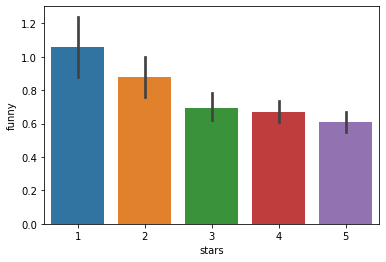

In [ ]:
sns.barplot(data=data, x="stars", y="funny")

In [ ]:
# GETTING THE MEAN VALUES OF THE VOTE COLUMNS WRT THE STARS ON THE REVIEW
stval = data.groupby('stars').mean()
stval

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [ ]:
# FINDING THE CORRELATION BETWEEN THE VOTE COLUMNS
stval.corr()

,cool,useful,funny,length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
length,-0.857664,0.699881,0.843461,1.000000


We can see that there is negative correlation between:

* Cool and Useful
* Cool and Funny
* Cool and Length  

We can say that the reviews marked cool tend to be short, not very useful to others and short.

Also, there is a positive correlation between:

* Funny and Useful    
* Funny and Length
* Useful and Length    

Thus, we can say that longer reviews tend to be funny and useful.

In [ ]:
# CLASSIFICATION
data_classes = data[(data['stars']==1) | (data['stars']==3) | (data['stars']==5)]
data_classes.head()
print(data_classes.shape)

# Seperate the dataset into X and Y for prediction
x = data_classes['text']
y = data_classes['stars']
print(x.head())
print(y.head())

(5547, 11)
0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object
0    5
1    5
3    5
4    5
6    5
Name: stars, dtype: int64


In [ ]:
# CLEANING THE REVIEWS - REMOVAL OF STOPWORDS AND PUNCTUATION
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cynthiali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# CONVERTING THE WORDS INTO A VECTOR
vocab = CountVectorizer(analyzer=text_process).fit(x)
print("length of the vocab is",len(vocab.vocabulary_))

length of the vocab is 31336


In [ ]:
# print out the first text of the review
print(x[0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [ ]:
vocab0 = vocab.transform([x[0]])
print(vocab0)

  (0, 292)	1
  (0, 1213)	1
  (0, 1811)	1
  (0, 3537)	1
  (0, 5139)	1
  (0, 5256)	2
  (0, 6275)	1
  (0, 8521)	1
  (0, 10646)	1
  (0, 10647)	1
  (0, 11128)	2
  (0, 11479)	1
  (0, 11779)	1
  (0, 12206)	2
  (0, 12221)	1
  (0, 12297)	1
  (0, 12386)	1
  (0, 12675)	1
  (0, 12689)	1
  (0, 13135)	1
  (0, 13186)	1
  (0, 14247)	1
  (0, 15385)	1
  (0, 16292)	1
  (0, 16412)	1
  :	:
  (0, 23318)	1
  (0, 23801)	1
  (0, 23902)	1
  (0, 23976)	1
  (0, 24080)	1
  (0, 24177)	1
  (0, 24544)	2
  (0, 24972)	2
  (0, 26383)	1
  (0, 26543)	1
  (0, 26978)	1
  (0, 27029)	1
  (0, 27068)	1
  (0, 28403)	1
  (0, 28735)	1
  (0, 29230)	1
  (0, 29313)	1
  (0, 29620)	1
  (0, 30135)	1
  (0, 30240)	1
  (0, 30471)	1
  (0, 30488)	1
  (0, 30672)	1
  (0, 30854)	1
  (0, 30900)	1


In [ ]:
#     Now the words in the review number 78 have been converted into a vector.
#     The data that we can see is the transformed words.
#     If we now get the feature's name - we can get the word back!

print(vocab.get_feature_names()[1000:2000])

['Adult', 'Adults', 'Advisor', 'Advocate', 'Aegean', 'Aerobics', 'Aesthetically', 'Affordable', 'Africa', 'Afterall', 'Afterdark', 'Afterward', 'Afterwards', 'Agaves', 'Aged', 'Agent', 'Aggressive', 'Agree', 'Agua', 'Aguila', 'Agwa', 'Ah', 'Ahab', 'Ahh', 'Ahha', 'Ahhh', 'Ahhhhh', 'Ahhhhhh', 'Ahi', 'Ahmazing', 'Ahwahtukee', 'Ahwatukee', 'Ai', 'Aid', 'Aiellos', 'Aiko', 'Air', 'Airlines', 'Airpark', 'Airport', 'Airwarys', 'Airways', 'Airwaysnever', 'Aisha', 'Aji', 'Ajo', 'Akor', 'Al', 'Alabama', 'Aladdins', 'Alain', 'Alameda', 'Alan', 'Alas', 'AlasIve', 'Alaska', 'Alaskan', 'Alaus', 'Albacore', 'Albeit', 'Alber', 'Albertos', 'Albertsons', 'Alcatraz', 'Alcohol', 'Ale', 'Alemmmm', 'Alessias', 'Alex', 'Alexa', 'Alexs', 'Alfalfa', 'Alfonso', 'Alfred', 'Alfredo', 'Ali', 'Alice', 'Alicia', 'Alison', 'AllAmerican', 'AllStar', 'Allah', 'Allegiant', 'Allen', 'Allende', 'Allergic', 'Allesias', 'Allison', 'Allow', 'Allstars', 'Almond', 'Almost', 'Aloe', 'Aloft', 'Aloha', 'Along', 'Alongside', 'Alp',

/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x = vocab.transform(x)
#Shape of the matrix:
print("Shape of the sparse matrix: ", x.shape)
#Non-zero occurences:
print("Non-Zero occurences: ",x.nnz)

# DENSITY OF THE MATRIX
density = (x.nnz/(x.shape[0]*x.shape[1]))*100
print("Density of the matrix = ",density)

Shape of the sparse matrix:  (5547, 31336)
Non-Zero occurences:  312457
Density of the matrix =  0.17975812697942373


In [ ]:
# SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[  0   0   0   0   0]
 [ 75  49  38   0   0]
 [  0   0   0   0   0]
 [  7 180 105   0   0]
 [ 12  45 599   0   0]]
Score: 4.41
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.18      0.30      0.22       162
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00       292
           5       0.00      0.00      0.00       656

    accuracy                           0.04      1110
   macro avg       0.04      0.06      0.04      1110
weighted avg       0.03      0.04      0.03      1110



/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthial

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test)
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test,predrmfr))
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2))
print("Classification Report:")
print(classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[  0   0   0   0   0]
 [ 33  26 103   0   0]
 [  0   0   0   0   0]
 [  2 105 185   0   0]
 [  2  12 642   0   0]]
Score: 2.34
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.18      0.16      0.17       162
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00       292
           5       0.00      0.00      0.00       656

    accuracy                           0.02      1110
   macro avg       0.04      0.03      0.03      1110
weighted avg       0.03      0.02      0.02      1110



/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthial

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:")
print(classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[  0   0   0   0   0]
 [ 57  52  53   0   0]
 [  0   0   0   0   0]
 [ 31 139 122   0   0]
 [ 40 108 508   0   0]]
Score: 4.68
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.17      0.32      0.23       162
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00       292
           5       0.00      0.00      0.00       656

    accuracy                           0.05      1110
   macro avg       0.03      0.06      0.05      1110
weighted avg       0.03      0.05      0.03      1110



/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthial

In [ ]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:")
print(classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[  0   0   0   0   0]
 [ 31  23 108   0   0]
 [  0   0   0   0   0]
 [  5 122 165   0   0]
 [  1  19 636   0   0]]
Score: 2.07
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.14      0.14      0.14       162
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00       292
           5       0.00      0.00      0.00       656

    accuracy                           0.02      1110
   macro avg       0.03      0.03      0.03      1110
weighted avg       0.02      0.02      0.02      1110



/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthial

In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
"""# parameter evaluation
gbe = GradientBoostingClassifier(random_state=0)
parameters = {
     'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5]}
gridsearch=GridSearchCV(gbe,parameters,cv=100,scoring='roc_auc')
gridsearch.fit(x,y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)"""
#Boosting
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999)
gbi.fit(x_train,y_train)
predgbi = gbi.predict(x_test)
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))
print("Classification Report:")
print(classification_report(y_test,predgbi))

Confusion Matrix for Gradient Boosting Classifier:
[[  0   0   0   0   0]
 [ 61  33  68   0   0]
 [  0   0   0   0   0]
 [ 10 138 144   0   0]
 [  4  33 619   0   0]]
Score: 2.97
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.16      0.20      0.18       162
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00       292
           5       0.00      0.00      0.00       656

    accuracy                           0.03      1110
   macro avg       0.03      0.04      0.04      1110
weighted avg       0.02      0.03      0.03      1110



/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthial

In the above GBC code, I have commented the parameter evaluation code because it takes a lot of time for execution. In version 9 of this notebook , I ran only the parameter evaluation code, I got the parameters of:

* Learning Rate = 0.1
* Max Depth = 5
* Max Features = 0.5 

Hence, I used those features directly from Version 10 onwards for faster execution. If you want to see the running, you can either run version 9 or uncomment that part.

In [ ]:
# K Nearest Neighbour Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print("Confusion Matrix for K Neighbors Classifier:")
print(confusion_matrix(y_test,predknn))
print("Score: ",round(accuracy_score(y_test,predknn)*100,2))
print("Classification Report:")
print(classification_report(y_test,predknn))

Confusion Matrix for K Neighbors Classifier:
[[ 12  10 140]
 [  3  33 256]
 [  8  12 636]]
Score:  61.35
Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.07      0.13       162
           3       0.60      0.11      0.19       292
           5       0.62      0.97      0.75       656

    accuracy                           0.61      1110
   macro avg       0.58      0.39      0.36      1110
weighted avg       0.60      0.61      0.51      1110



In [ ]:
# XGBoost Classifier
import xgboost
from xgboost import XGBClassifier

# the class column has to start from 0 (as required since version 1.3.2). 
# An easy way to solve that is using LabelEncoder from sklearn.preprocssing library.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

xgb = XGBClassifier()
xgb.fit(x_train,y_train)
predxgb = xgb.predict(x_test)
print("Confusion Matrix for XGBoost Classifier:")
print(confusion_matrix(y_test,predxgb))
print("Score: ",round(accuracy_score(y_test,predxgb)*100,2))
print("Classification Report:")
print(classification_report(y_test,predxgb))

Confusion Matrix for XGBoost Classifier:
[[  0   0   0   0   0]
 [ 75  38  49   0   0]
 [  0   0   0   0   0]
 [ 12 162 118   0   0]
 [  9  36 611   0   0]]
Score:  3.42
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.16      0.23      0.19       162
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00       292
           5       0.00      0.00      0.00       656

    accuracy                           0.03      1110
   macro avg       0.03      0.05      0.04      1110
weighted avg       0.02      0.03      0.03      1110



/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthial

In [ ]:
# MULTILAYER PERCEPTRON CLASSIFIER
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(x_train,y_train)
predmlp = mlp.predict(x_test)
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,predmlp))
print("Score:",round(accuracy_score(y_test,predmlp)*100,2))
print("Classification Report:")
print(classification_report(y_test,predmlp))

Confusion Matrix for Multilayer Perceptron Classifier:
[[  0   0   0   0   0]
 [ 96  36  30   0   0]
 [  0   0   0   0   0]
 [ 21 185  86   0   0]
 [ 11  65 580   0   0]]
Score: 3.24
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.13      0.22      0.16       162
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00       292
           5       0.00      0.00      0.00       656

    accuracy                           0.03      1110
   macro avg       0.03      0.04      0.03      1110
weighted avg       0.02      0.03      0.02      1110



/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthiali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/cynthial

From the above algorithm modelling, we can list the accuracy for each model:

*  Multilayer Perceptron= 77.57%
* Multinomial Naive Bayes = 76.94%
* Gradient Boosting Classifier = 73.87%
* XGBoost Classifier = 70.81%
* Random Forest Classifier = 67.57%
* Decision Tree = 65.5%
* K Neighbor Classifier = 61.35%
* Support Vector Machine  = 59.1%


In [ ]:
# POSITIVE REVIEW
pr = data['text'][0]
print(pr)
print("Actual Rating:")
print(data['stars'][0])
pr_t = vocab.transform([pr])
print("Predicted Rating:")
mlp.predict(pr_t)[0]

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
Actual Rating:
5
Predicted Rating:


2

In [ ]:
# AVERAGE REVIEW
ar = data['text'][16]
print(ar)
print("Actual Rating:")
print(data['stars'][16])
ar_t = vocab.transform([ar])
print("Predicted Rating:")
mlp.predict(ar_t)[0]

We went here on a Saturday afternoon and this place was incredibly empty.  They had brunch specials going on, including $2 bloody mary's and mimosas, but we were more in the mood for lunch.  Except for the bloody mary, I had to try one.  It came out in a high-ball-sized glass.  Boo!  But it was really tasty. Yay!  The hubby remembered a sign outside the restaurant a few weeks back that said they had Arrogant Bastard, and he got a 22 oz bottle for $4.75.  Hey, that's not fair!!

Next up: the wings.  We were a bit hesitant to order them when the waitress informed us that they are "seasoned" but not sauced, so they can't be ordered hot.  We did ask for them crispy though, and the waitress even asked the cooks to throw them back in for a few minutes when they came out not visibly crispy.  These non-traditional wings were actually pretty damn good.  The seasoning was a little spicy and salty with just a hint of sweet.  If I were in the mood for the tang and kick of Frank's Hot Sauce, these 

1

In [ ]:
# NEGATIVE REVIEW
nr = data['text'][16]
print(nr)
print("Actual Rating:")
print(data['stars'][23])
nr_t = vocab.transform([nr])
print("Predicted Rating:")
mlp.predict(nr_t)[0]

We went here on a Saturday afternoon and this place was incredibly empty.  They had brunch specials going on, including $2 bloody mary's and mimosas, but we were more in the mood for lunch.  Except for the bloody mary, I had to try one.  It came out in a high-ball-sized glass.  Boo!  But it was really tasty. Yay!  The hubby remembered a sign outside the restaurant a few weeks back that said they had Arrogant Bastard, and he got a 22 oz bottle for $4.75.  Hey, that's not fair!!

Next up: the wings.  We were a bit hesitant to order them when the waitress informed us that they are "seasoned" but not sauced, so they can't be ordered hot.  We did ask for them crispy though, and the waitress even asked the cooks to throw them back in for a few minutes when they came out not visibly crispy.  These non-traditional wings were actually pretty damn good.  The seasoning was a little spicy and salty with just a hint of sweet.  If I were in the mood for the tang and kick of Frank's Hot Sauce, these 

1

## Future work
In the data count below, we can see that predictions are biased towards positive reviews. It is possible that the dataset has more positive reviews as compared to negative reviews.

In [ ]:
count = data['stars'].value_counts()
print(count)

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64
